# Data Understanding Notebook

The goal of this notebook is to understand the given dataset. Complementary, also information found on the internet has completed this analysis

In [67]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################
import csv

#from implementations import * #our implementations of the functions done by us
import datetime
#from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
np.logspace(-8,0,10)

array([  1.00000000e-08,   7.74263683e-08,   5.99484250e-07,
         4.64158883e-06,   3.59381366e-05,   2.78255940e-04,
         2.15443469e-03,   1.66810054e-02,   1.29154967e-01,
         1.00000000e+00])

In [2]:
import csv
def load_csv_data(data_path, sub_sample=False):
    """Loads data and returns y (class labels), tX (features) and ids (event ids)"""
    y = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    x = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    ids = x[:, 0].astype(np.int)
    input_data = x[:, 2:]

    # convert class labels from strings to binary (-1,1)
    yb = np.ones(len(y))
    yb[np.where(y=='b')] = -1
    
    # sub-sample
    if sub_sample:
        yb = yb[::50]
        input_data = input_data[::50]
        ids = ids[::50]

    return yb, input_data, ids

In [3]:
DATA_FOLDER = 'data/'
data_file = DATA_FOLDER+'test.csv'

y_trai, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)

AAA = 0
BBB = 0

In [4]:
train = pd.DataFrame(tx_train)
y_train = pd.DataFrame(y_trai)
test = pd.DataFrame(tx_test)
y_test = pd.DataFrame(y_test)

In [5]:
 ########## to extract name of columns ############################
#data_file =DATA_FOLDER +'train.xls'
#train = pd.read_excel(data_file)
#data_file =DATA_FOLDER +'test.xls'
#test = pd.read_excel(data_file)
#test.columns
train.describe()

0              1              2              3   \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean      -49.023079      49.239819      81.181982      57.895962   
std       406.345647      35.344886      40.828691      63.655682   
min      -999.000000       0.000000       6.329000       0.000000   
25%        78.100750      19.241000      59.388750      14.068750   
50%       105.012000      46.524000      73.752000      38.467500   
75%       130.606250      73.598000      92.259000      79.169000   
max      1192.026000     690.075000    1349.351000    2834.999000   

                  4              5              6              7   \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean     -708.420675    -601.237051    -709.356603       2.373100   
std       454.480565     657.972302     453.019877       0.782911   
min      -999.000000    -999.000000    -999.000000       0.208000   
25%      -999.000000    -999.000000    -999.000000       1.810000   
50%      -999.000000    -999.000000    -999.000000       2.491500   
75%         0.490000      83.446000      -4.593000       2.961000   
max         8.503000    4974.979000      16.690000       5.684000   

                  8              9       ...                   20  \
count  250000.000000  250000.000000      ...        250000.000000   
mean       18.917332     158.432217      ...            -0.010119   
std        22.273494     115.706115      ...             1.812223   
min         0.000000      46.104000      ...            -3.142000   
25%         2.841000      77.550000      ...            -1.575000   
50%        12.315500     120.664500      ...            -0.024000   
75%        27.591000     200.478250      ...             1.561000   
max      2834.999000    1852.462000      ...             3.142000   

                  21             22             23             24  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean      209.797178       0.979176    -348.329567    -399.254314   
std       126.499506       0.977426     532.962789     489.338286   
min        13.678000       0.000000    -999.000000    -999.000000   
25%       123.017500       0.000000    -999.000000    -999.000000   
50%       179.739000       1.000000      38.960000      -1.872000   
75%       263.379250       2.000000      75.349000       0.433000   
max      2003.976000       3.000000    1120.573000       4.499000   

                  25             26             27             28  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean     -399.259788    -692.381204    -709.121609    -709.118631   
std       489.333883     479.875496     453.384624     453.389017   
min      -999.000000    -999.000000    -999.000000    -999.000000   
25%      -999.000000    -999.000000    -999.000000    -999.000000   
50%        -2.093000    -999.000000    -999.000000    -999.000000   
75%         0.503000      33.703000      -2.457000      -2.275000   
max         3.141000     721.456000       4.500000       3.142000   

                  29  
count  250000.000000  
mean       73.064591  
std        98.015662  
min         0.000000  
25%         0.000000  
50%        40.512500  
75%       109.933750  
max      1633.433000  

[8 rows x 30 columns]

In [6]:
# columns of the csv file
columns = ['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

#columns of our numpy arrays
desired_cols = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


# rename the columns with their original name
train.columns = desired_cols
test.columns = desired_cols
y_train.columns = ['Prediction']

In [7]:
### run this line if you wanna add the indexes
BBB = 0

In [8]:
train_ori = train.copy()
test_ori = test.copy()
if BBB == 0:
    train.reset_index(drop=False,inplace=True)
    test.reset_index(drop=False,inplace=True)
    y_train.reset_index(drop=False,inplace=True)
    y_test.reset_index(drop=False,inplace=True)
train.replace(-999, np.nan,inplace=True)
test.replace(-999, np.nan,inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
index                          250000 non-null int64
DER_mass_MMC                   211886 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           72543 non-null float64
DER_mass_jet_jet               72543 non-null float64
DER_prodeta_jet_jet            72543 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         72543 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi    

In [10]:
df_info = train.copy()
df_info = df_info[[#'DER_mass_MMC', 'DER_mass_transverse_met_lep',\
                   #'PRI_jet_subleading_phi','PRI_jet_leading_phi','PRI_tau_phi','PRI_lep_phi','PRI_met_phi',\
                   'PRI_jet_subleading_eta','PRI_jet_leading_eta','PRI_lep_eta','PRI_tau_eta',\
                   'DER_mass_vis',\
                   'PRI_jet_leading_pt','PRI_jet_subleading_pt','PRI_jet_all_pt','DER_sum_pt','PRI_lep_pt','PRI_tau_pt',\
                   'DER_pt_h','DER_pt_tot',\
                   \
                   'PRI_jet_num',\
                   'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet',
                   'DER_deltar_tau_lep','DER_pt_ratio_lep_tau', 'PRI_met','PRI_met_sumet',
                   'DER_met_phi_centrality','DER_lep_eta_centrality']]
df_info.describe()

PRI_jet_subleading_eta  PRI_jet_leading_eta    PRI_lep_eta  \
count            72543.000000        150087.000000  250000.000000   
mean                -0.011845            -0.003275      -0.019507   
std                  2.031743             1.784546       1.264982   
min                 -4.500000            -4.499000      -2.505000   
25%                 -1.612000            -1.342000      -1.014000   
50%                 -0.010000             0.000000      -0.045000   
75%                  1.589500             1.336000       0.959000   
max                  4.500000             4.499000       2.503000   

         PRI_tau_eta   DER_mass_vis  PRI_jet_leading_pt  \
count  250000.000000  250000.000000       150087.000000   
mean       -0.010973      81.181982           84.822105   
std         1.214079      40.828691           60.662276   
min        -2.499000       6.329000           30.000000   
25%        -0.925000      59.388750           44.422500   
50%        -0.023000      73.752000           65.561000   
75%         0.898000      92.259000          103.342000   
max         2.497000    1349.351000         1120.573000   

       PRI_jet_subleading_pt  PRI_jet_all_pt     DER_sum_pt     PRI_lep_pt  \
count           72543.000000   250000.000000  250000.000000  250000.000000   
mean               57.679474       73.064591     158.432217      46.660207   
std                31.985782       98.015662     115.706115      22.064922   
min                30.000000        0.000000      46.104000      26.000000   
25%                37.312000        0.000000      77.550000      32.375000   
50%                47.902000       40.512500     120.664500      40.516000   
75%                66.637000      109.933750     200.478250      53.390000   
max               721.456000     1633.433000    1852.462000     560.271000   

                ...              PRI_jet_num  DER_deltaeta_jet_jet  \
count           ...            250000.000000          72543.000000   
mean            ...                 0.979176              2.403735   
std             ...                 0.977426              1.742226   
min             ...                 0.000000              0.000000   
25%             ...                 0.000000              0.882500   
50%             ...                 1.000000              2.107000   
75%             ...                 2.000000              3.690000   
max             ...                 3.000000              8.503000   

       DER_mass_jet_jet  DER_prodeta_jet_jet  DER_deltar_tau_lep  \
count      72543.000000         72543.000000       250000.000000   
mean         371.783360            -0.821688            2.373100   
std          397.699325             3.584362            0.782911   
min           13.602000           -18.066000            0.208000   
25%          111.977000            -2.629000            1.810000   
50%          225.885000            -0.244000            2.491500   
75%          478.226000             0.958000            2.961000   
max         4974.979000            16.690000            5.684000   

       DER_pt_ratio_lep_tau        PRI_met  PRI_met_sumet  \
count         250000.000000  250000.000000  250000.000000   
mean               1.437609      41.717235     209.797178   
std                0.844743      32.894693     126.499506   
min                0.047000       0.109000      13.678000   
25%                0.883000      21.398000     123.017500   
50%                1.280000      34.802000     179.739000   
75%                1.777000      51.895000     263.379250   
max               19.773000    2842.617000    2003.976000   

       DER_met_phi_centrality  DER_lep_eta_centrality  
count           250000.000000            72543.000000  
mean                -0.128305                0.458290  
std                  1.193585                0.398681  
min                 -1.414000                0.000000  
25%                 -1.371000                0.004000  
50%                 

In [11]:
# phi and eta
df_tmp = train.copy()
df_tmp = df_tmp[[  'PRI_jet_subleading_phi','PRI_jet_leading_phi','PRI_tau_phi','PRI_lep_phi','PRI_met_phi',\
                   'PRI_jet_subleading_eta','PRI_jet_leading_eta','PRI_lep_eta','PRI_tau_eta',\
                   'DER_met_phi_centrality','DER_lep_eta_centrality']]
df_tmp.describe()

PRI_jet_subleading_phi  PRI_jet_leading_phi    PRI_tau_phi  \
count            72543.000000        150087.000000  250000.000000   
mean                -0.001582            -0.012393      -0.008171   
std                  1.816950             1.813385       1.816763   
min                 -3.142000            -3.142000      -3.142000   
25%                 -1.576500            -1.584000      -1.575000   
50%                 -0.002000            -0.033000      -0.033000   
75%                  1.576000             1.562000       1.565000   
max                  3.142000             3.141000       3.142000   

         PRI_lep_phi    PRI_met_phi  PRI_jet_subleading_eta  \
count  250000.000000  250000.000000            72543.000000   
mean        0.043543      -0.010119               -0.011845   
std         1.816611       1.812223                2.031743   
min        -3.142000      -3.142000               -4.500000   
25%        -1.522000      -1.575000               -1.612000   
50%         0.086000      -0.024000               -0.010000   
75%         1.618000       1.561000                1.589500   
max         3.142000       3.142000                4.500000   

       PRI_jet_leading_eta    PRI_lep_eta    PRI_tau_eta  \
count        150087.000000  250000.000000  250000.000000   
mean             -0.003275      -0.019507      -0.010973   
std               1.784546       1.264982       1.214079   
min              -4.499000      -2.505000      -2.499000   
25%              -1.342000      -1.014000      -0.925000   
50%               0.000000      -0.045000      -0.023000   
75%               1.336000       0.959000       0.898000   
max               4.499000       2.503000       2.497000   

       DER_met_phi_centrality  DER_lep_eta_centrality  
count           250000.000000            72543.000000  
mean                -0.128305                0.458290  
std                  1.193585                0.398681  
min                 -1.414000                0.000000  
25%                 -1.371000                0.004000  
50%                 -0.356000                0.454000  
75%                  1.225000                0.879000  
max                  1.414000                1.000000

In [12]:
# pt's
df_tmp = train.copy()
df_tmp = df_tmp[[  'PRI_jet_leading_pt','PRI_jet_subleading_pt','PRI_jet_all_pt','DER_sum_pt','PRI_lep_pt','PRI_tau_pt',\
                   'DER_pt_h','DER_pt_tot']][df_tmp['PRI_jet_all_pt']!=0] # taking out jet0
df_tmp.describe()

PRI_jet_leading_pt  PRI_jet_subleading_pt  PRI_jet_all_pt  \
count       150087.000000           72543.000000   150087.000000   
mean            84.822105              57.679474      121.703731   
std             60.662276              31.985782      100.413845   
min             30.000000              30.000000       30.000000   
25%             44.422500              37.312000       48.947000   
50%             65.561000              47.902000       91.762000   
75%            103.342000              66.637000      159.062000   
max           1120.573000             721.456000     1633.433000   

          DER_sum_pt     PRI_lep_pt     PRI_tau_pt       DER_pt_h  \
count  150087.000000  150087.000000  150087.000000  150087.000000   
mean      213.056414      49.520003      41.832681      87.234780   
std       120.269295      25.473017      25.648489      66.412457   
min        77.017000      26.000000      20.000000       0.000000   
25%       129.789500      32.780000      25.507500      42.135500   
50%       178.643000      41.844000      33.874000      67.630000   
75%       257.436000      57.487000      48.957000     111.598000   
max      1852.462000     461.896000     622.862000    1053.807000   

          DER_pt_tot  
count  150087.000000  
mean       22.308055  
std        24.748900  
min         0.000000  
25%         3.425000  
50%        18.231000  
75%        31.004500  
max       513.659000

In [13]:
# rest
df_tmp = train.copy()
df_tmp = df_tmp[['DER_mass_MMC', 'DER_mass_transverse_met_lep',\
                   'DER_mass_vis',\
                   'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet',
                   'DER_deltar_tau_lep','DER_pt_ratio_lep_tau', 'PRI_met','PRI_met_sumet']][df_tmp['PRI_jet_num']!=0]
df_tmp.describe()

DER_mass_MMC  DER_mass_transverse_met_lep   DER_mass_vis  \
count  138096.000000                150087.000000  150087.000000   
mean      122.494858                    42.884762      80.723762   
std        60.043466                    36.028021      42.575765   
min         9.806000                     0.000000       6.329000   
25%        92.743000                    13.958000      58.469500   
50%       112.831000                    34.806000      72.557000   
75%       134.684000                    65.157500      90.913000   
max      1192.026000                   690.075000    1329.913000   

       DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
count          72543.000000      72543.000000         72543.000000   
mean               2.403735        371.783360            -0.821688   
std                1.742226        397.699325             3.584362   
min                0.000000         13.602000           -18.066000   
25%                0.882500        111.977000            -2.629000   
50%                2.107000        225.885000            -0.244000   
75%                3.690000        478.226000             0.958000   
max                8.503000       4974.979000            16.690000   

       DER_deltar_tau_lep  DER_pt_ratio_lep_tau        PRI_met  PRI_met_sumet  
count       150087.000000         150087.000000  150087.000000  150087.000000  
mean             2.178808              1.467463      48.494382     265.673665  
std              0.778822              0.980422      37.593736     130.255341  
min              0.208000              0.047000       0.200000      21.066000  
25%              1.594000              0.823000      24.297000     176.799000  
50%              2.208000              1.246000      39.470000     236.984000  
75%              2.759000              1.825000      61.028000     321.399500  
max              5.655000             19.773000     951.363000    2003.976000

In [14]:
train['DER_mass_transverse_met_lep'][train['DER_mass_transverse_met_lep']==0].value_counts()

0.0    3
Name: DER_mass_transverse_met_lep, dtype: int64

In [15]:
#y.head(10)

## now a generic part: 


In [16]:
def jet_separation(data):
    jet0 = data[data['PRI_jet_num'] == 0]
    jet1 = data[data['PRI_jet_num'] == 1]
    jet2 = data[data['PRI_jet_num'] == 2]
    jet3 = data[data['PRI_jet_num'] == 3]
    tot = jet0.shape[0]+jet1.shape[0]+jet2.shape[0]+jet3.shape[0]
    
    print(('Data: {data}\n jet0: {j0} {prop_j0}%\n jet1: {j1} {prop_j1}%\n jet2: {j2} {prop_j2}%'+\
          '\n jet3: {j3} {prop_j3}%\ntotat= {tot}').format\
          (data=data.shape, j0=jet0.shape, j1=jet1.shape, j2=jet2.shape, j3=jet3.shape, tot=tot,\
           prop_j0=jet0.shape[0]/data.shape[0]*100,\
           prop_j1=jet1.shape[0]/data.shape[0]*100,\
           prop_j2=jet2.shape[0]/data.shape[0]*100,\
           prop_j3=jet3.shape[0]/data.shape[0]*100 ))
    
    return jet0, jet1, jet2, jet3

In [17]:
train_tot = pd.merge(y_train,train, left_on='index', right_on='index', how = 'right')

In [18]:
# Separation of the dataset for the 4 different values of PRI_jet_num
jet0, jet1, jet2, jet3 = jet_separation(train_tot)

Data: (250000, 32)
 jet0: (99913, 32) 39.9652%
 jet1: (77544, 32) 31.0176%
 jet2: (50379, 32) 20.1516%
 jet3: (22164, 32) 8.8656%
totat= 250000


In [19]:
def proportions(train, y_train, num_jet):
    num_back = y_train[train['PRI_jet_num']==num_jet].Prediction.value_counts()[-1]
    num_signal = y_train[train['PRI_jet_num']== num_jet].Prediction.value_counts()[1]
    prop = num_signal/(num_back+num_signal)
    print('Proportions of signal for jet{jet} are: {prop}'.format(jet=num_jet, prop=prop))

In [20]:
# Print proportions of predicted signal in the train dataset
proportions(train, y_train, num_jet=0)
proportions(train, y_train, num_jet=1)
proportions(train, y_train, num_jet=2)
proportions(train, y_train, num_jet=3)

Proportions of signal for jet0 are: 0.2551419735169598
Proportions of signal for jet1 are: 0.35734550706695556
Proportions of signal for jet2 are: 0.5108080747930686
Proportions of signal for jet3 are: 0.3036906695542321


In [21]:
merged_df = pd.merge(y_train,train, left_on='index', right_on='index', how = 'right')
background = merged_df[merged_df['Prediction']==-1.0]
signal = merged_df[merged_df['Prediction']==1.0]

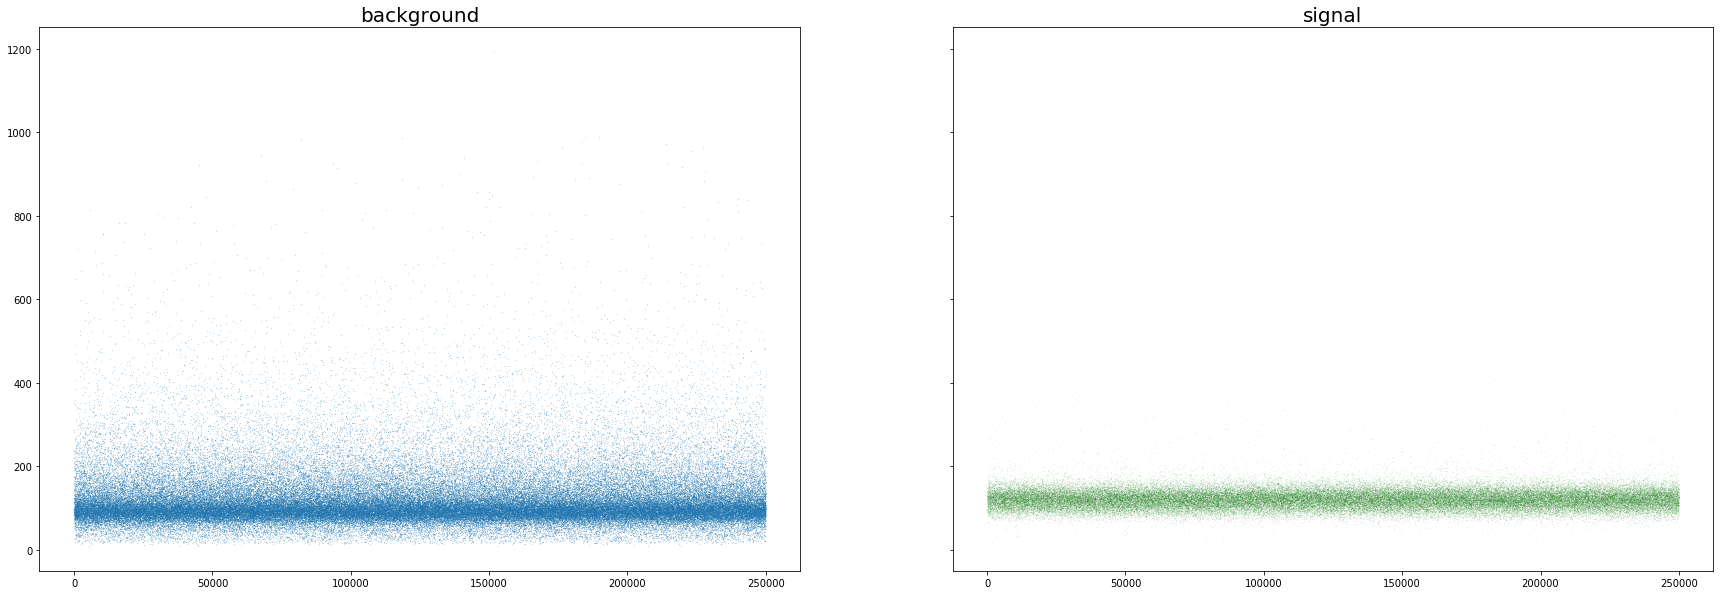

In [22]:
column = 'DER_mass_MMC'
fig1, ax1 = plt.subplots(1,2,sharey='row');
fig1.set_figheight(10)
fig1.set_figwidth(30)
ax1[0].scatter(background['index'],background[column],s=0.01);
ax1[0].set_title('background',fontsize=20)
ax1[1].scatter(signal['index'],signal[column],color='g',s=0.001);
ax1[1].set_title('signal',fontsize=20)


In [23]:
background.shape[0], signal.shape[0] ,background.sort_values([column]).shape[0]

(164333, 85667, 164333)

In [24]:
import seaborn as sns

sns.set()

def give_bins_column(df,column,bin_num):
    sorted_col = df.sort_values([column])[column]
    minBin = sorted_col.min()
    maxBin = sorted_col.max()
    bins = np.linspace(minBin, maxBin, bin_num)
    return pd.cut(sorted_col,bins)

In [25]:
signal.columns

Index(['index', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [26]:
categorical = ['PRI_jet_num']

special = ['DER_mass_MMC'] #our special case

string = ['DER_mass_transverse_met_lep','DER_mass_vis','DER_deltaeta_jet_jet','PRI_jet_leading_eta',\
         'PRI_jet_subleading_eta'] # interesting behavior

moyen = ['DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','PRI_met_sumet'] # some interesting differences

bof = ['DER_pt_h','DER_mass_jet_jet','DER_pt_ratio_lep_tau','DER_lep_eta_centrality',\
      'PRI_tau_pt','PRI_tau_eta','PRI_lep_pt','PRI_lep_eta',\
      'PRI_met','PRI_jet_leading_pt','PRI_jet_subleading_pt','PRI_jet_all_pt'] # similar distribution

not_important_to_me = ['PRI_jet_subleading_phi','PRI_jet_leading_phi','PRI_met_phi',\
                       'PRI_lep_phi','PRI_tau_phi','DER_met_phi_centrality'] # about the same distribution

/home/zampieri/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


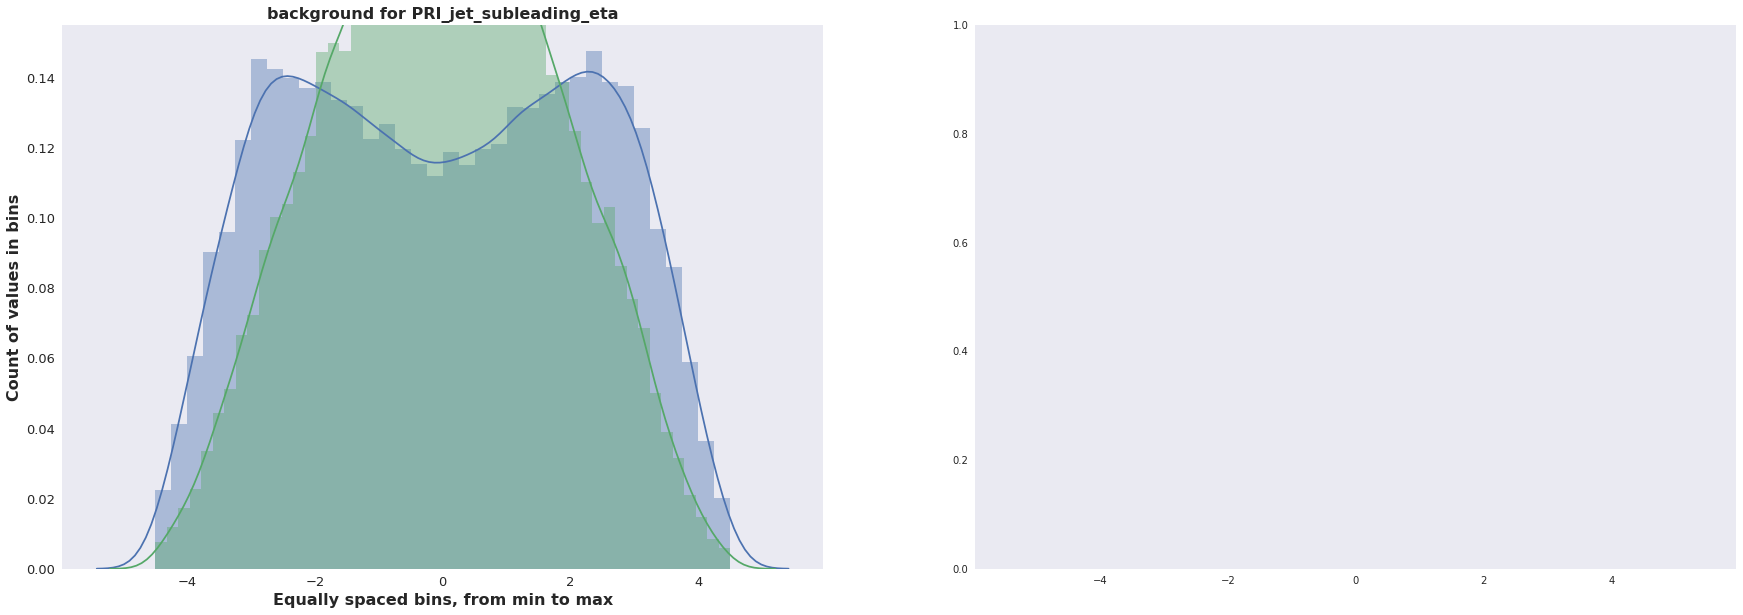

In [62]:
column = 'PRI_jet_subleading_eta'
bin_num = 100

fig1, ax1 = plt.subplots(1,2,sharex='row')
fig1.set_figheight(10)
fig1.set_figwidth(30)

#ax1[0].set(xscale="log", yscale="log")
#ax1[1].set_xticklabels([])
#   autumn    Dark2    winter   summer    plasma   spring
def my_count_plot(df,name,pos):
    ncount = len(give_bins_column(df,column,bin_num))
    #sns.countplot(give_bins_column(df,column,bin_num)/ncount, ax = ax1[pos],palette='winter')
    sns.distplot(df.sort_values([column])[column],ax = ax1[pos])
    
    
    
    #ax1[pos].set(xticks=np.linspace(1,bin_num,5))
    ax1[pos].set_xlabel( 'Equally spaced bins, from min to max' ,fontsize=16).set_weight('bold')
    ax1[pos].set_ylabel('Count of values in bins', fontsize=16).set_weight('bold')
    ax1[pos].set_title(name+' for '+column, fontsize=16).set_weight('bold')
    for label in ax1[pos].get_xticklabels():
            label.set_fontsize(13)
    for label in ax1[pos].get_yticklabels():
            label.set_fontsize(13)      

    ax1[pos].legend()
    fig1.savefig('lala.png', bbox_inches='tight')
    
signal2 = signal[['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']].dropna()    

background2 = background[['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']].dropna() 
    
my_count_plot(signal2,'signal',pos=0)
my_count_plot(background2,'background',pos=0)

In [41]:
print(signal.DER_mass_MMC.quantile(.75),'\n',background.DER_mass_MMC.quantile(.75))
print ('NAN in signal: ',signal['DER_mass_MMC'].isnull().sum(), \
       '         NAN in background: ',background['DER_mass_MMC'].isnull().sum() )

135.27824999999999 
 135.94125
NAN in signal:  2835          NAN in background:  35279


In [42]:
signal['PRI_lep_phi'].describe()

count    85667.000000
mean         0.053923
std          1.813160
min         -3.142000
25%         -1.502000
50%          0.103000
75%          1.627500
max          3.142000
Name: PRI_lep_phi, dtype: float64

In [43]:
background['PRI_lep_phi'].describe()

count    164333.000000
mean          0.038132
std           1.818390
min          -3.142000
25%          -1.534000
50%           0.076000
75%           1.612000
max           3.142000
Name: PRI_lep_phi, dtype: float64

In [44]:
train.columns

Index(['index', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [45]:
31//3

10

## some test to extract the name of data for the plotting

In [46]:
import inspect

x,y,z = 1,2,3

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

retrieve_name(train)[0]

'train'

In [47]:
# Test funtion to visualize the dataset 
def plots_values_train_test(data):
    needed_subplots = (len(data.columns)-1)//3+1 # the first column being the index
    for k in range (needed_subplots):
        fig1, ax1 = plt.subplots(1,3)
        fig1.set_figheight(10)
        fig1.set_figwidth(30)

        for i,column in enumerate(data.columns[1+3*k:3*(k+1)+1]):
            ax1[i].set_title('Values in column {}'.format(column),fontsize=20,fontweight="bold")
            ax1[i].scatter(train['index'],train.sort_values([column])[column])

            
        #fig1.savefig('values{}.png'.format(k))
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

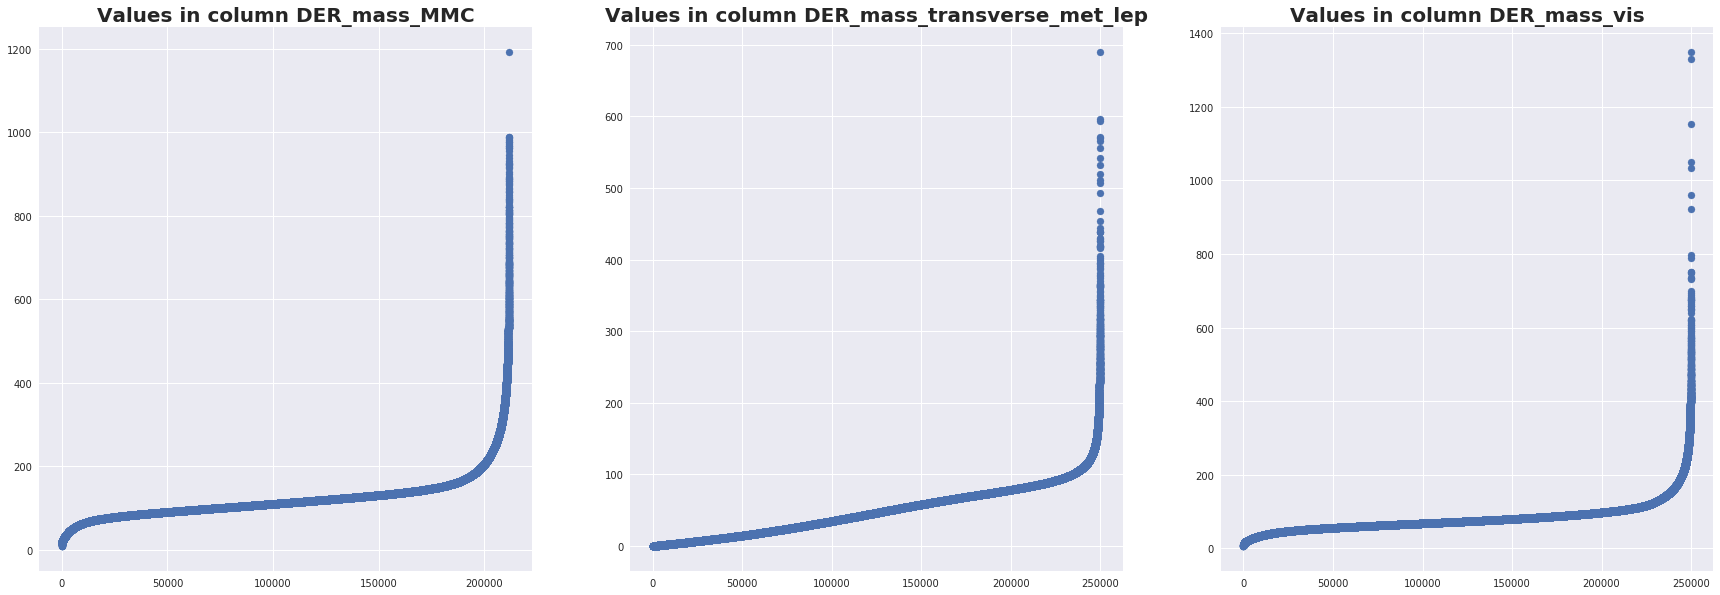

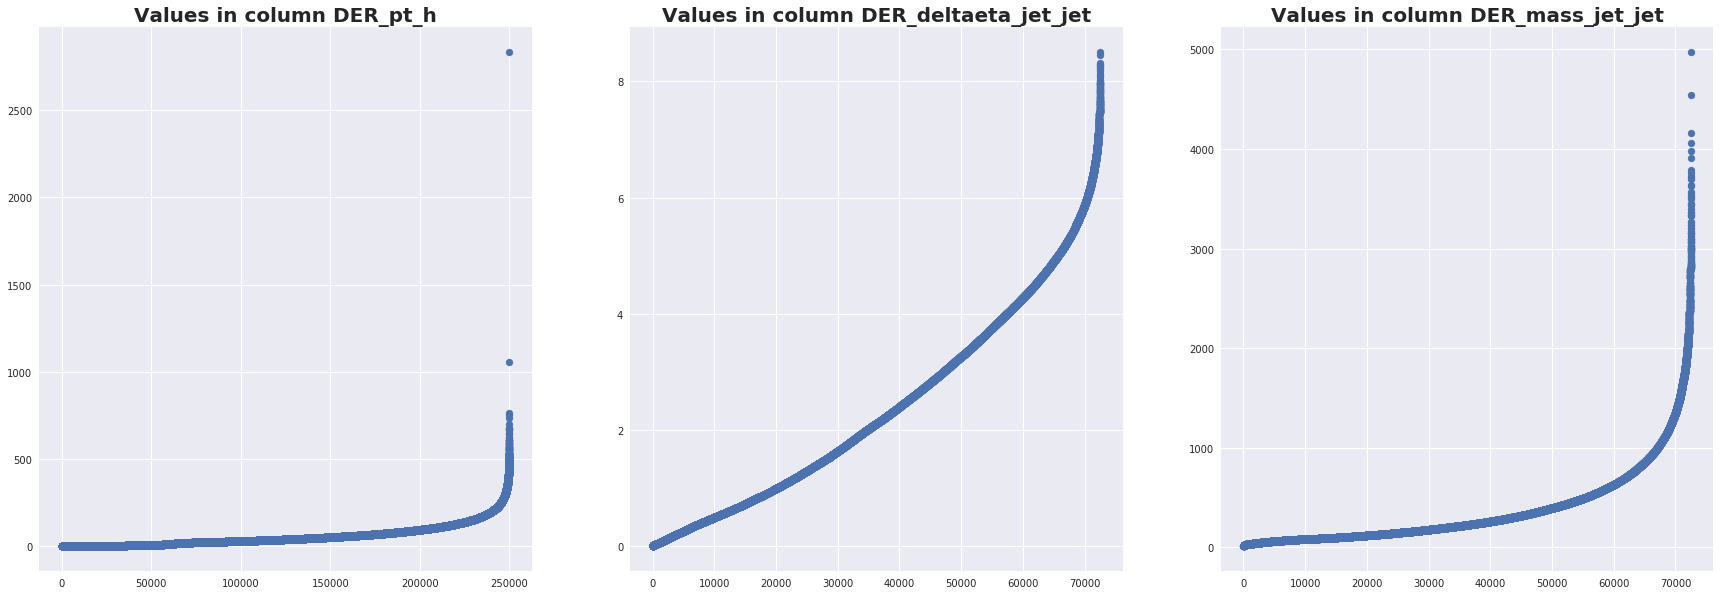

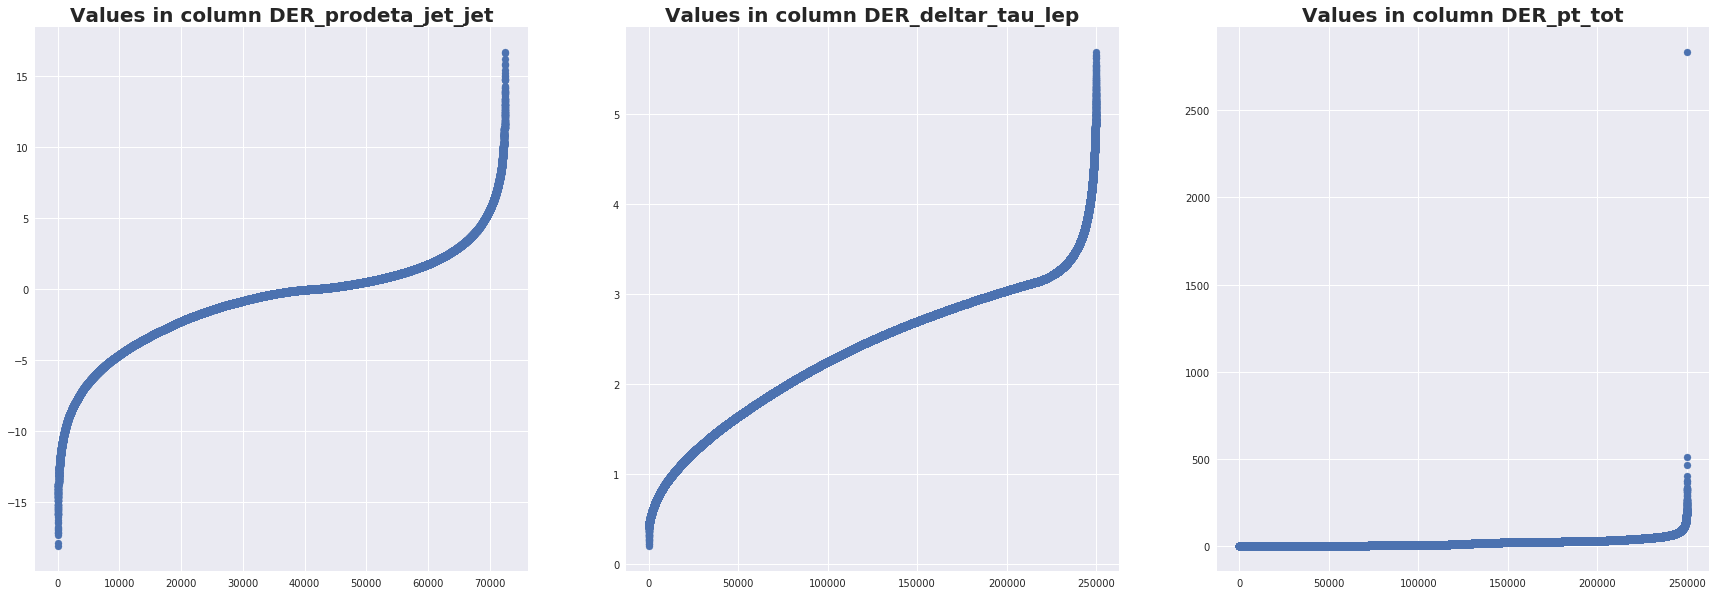

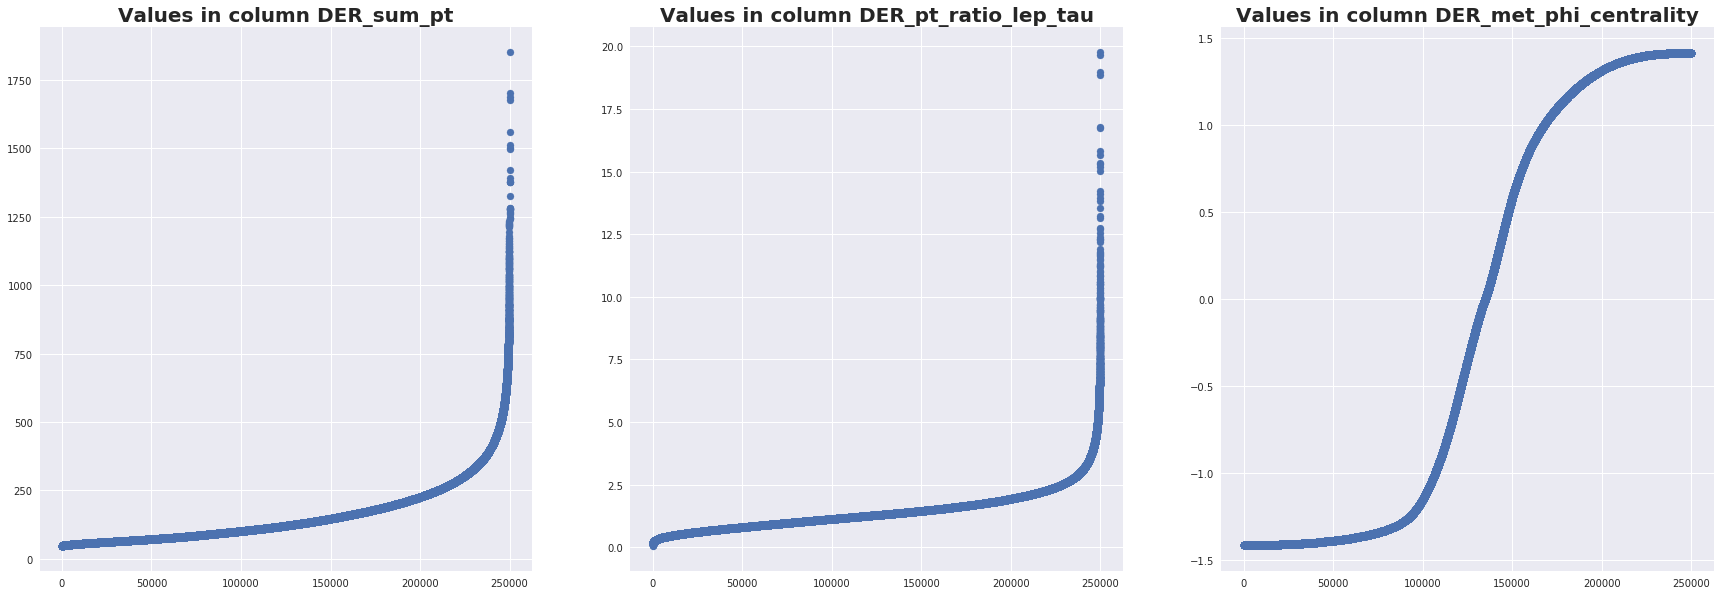

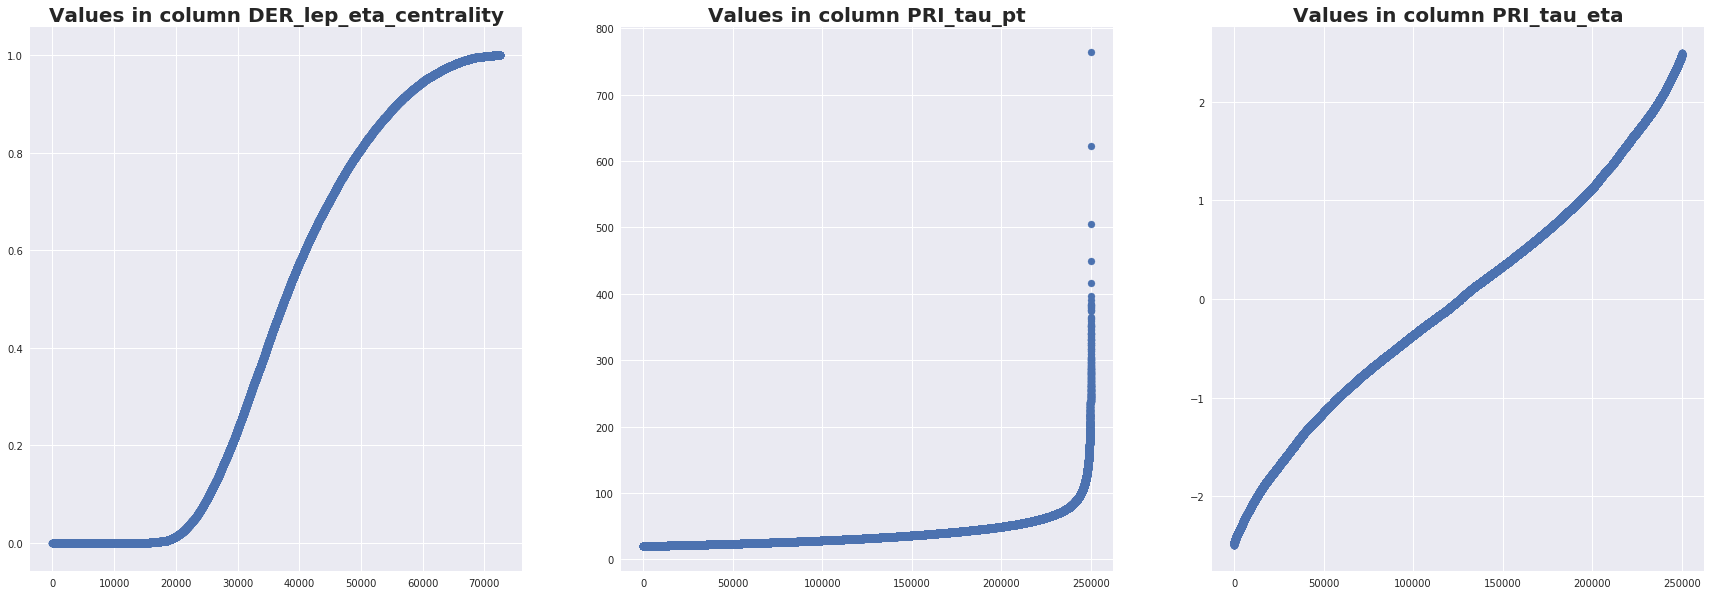

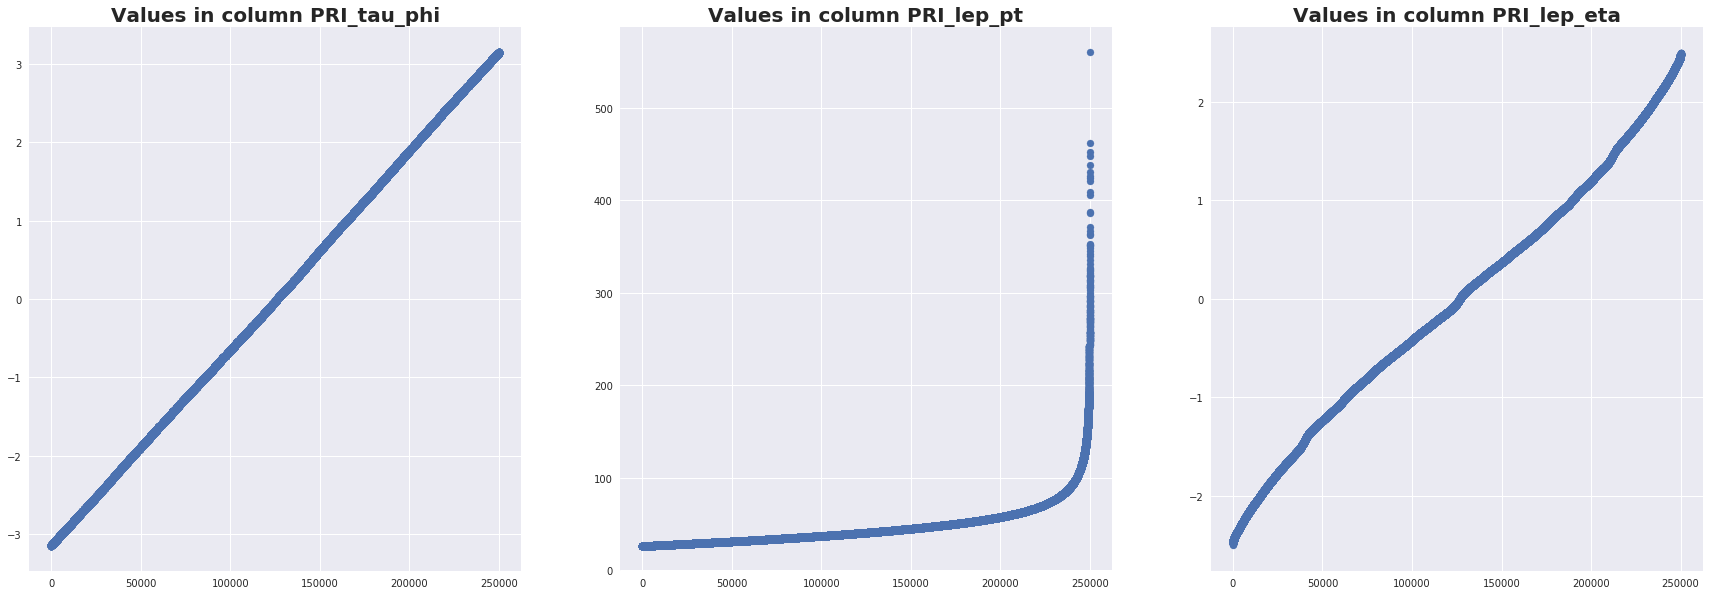

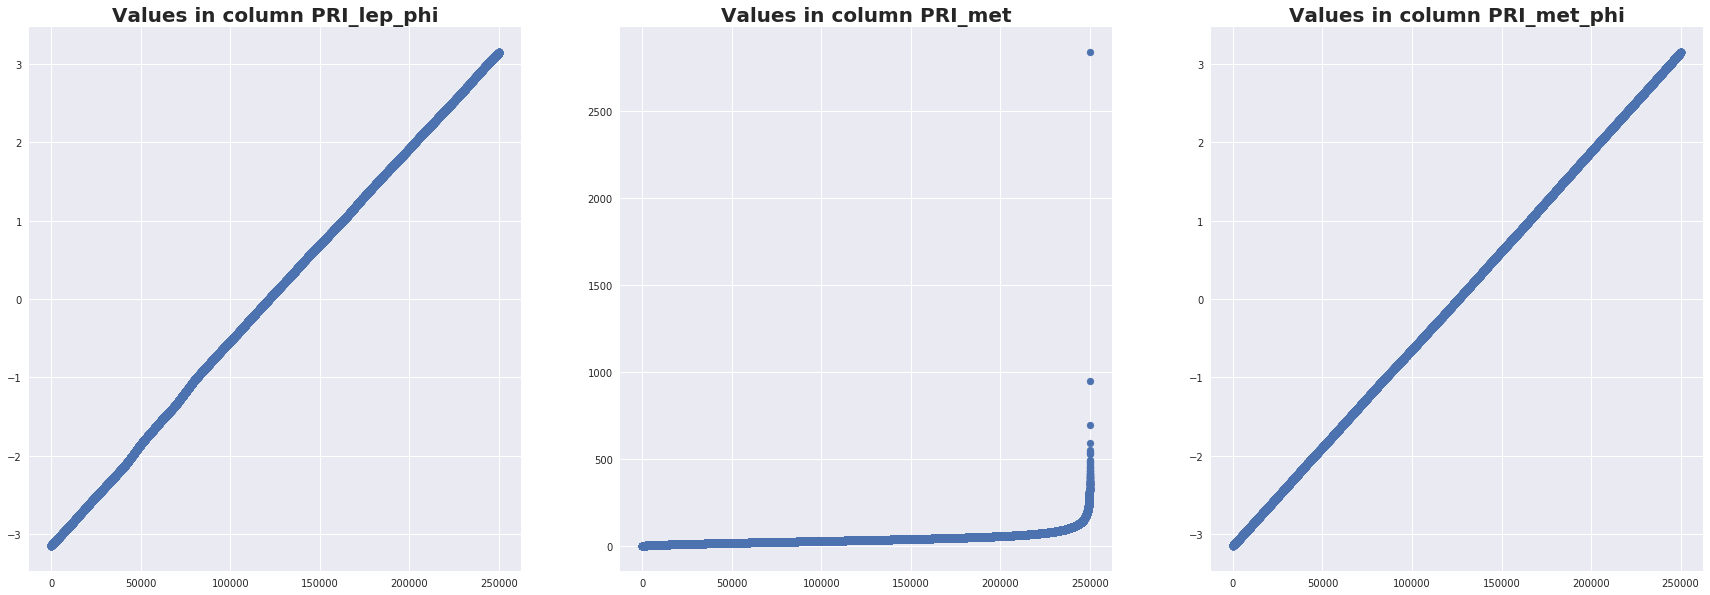

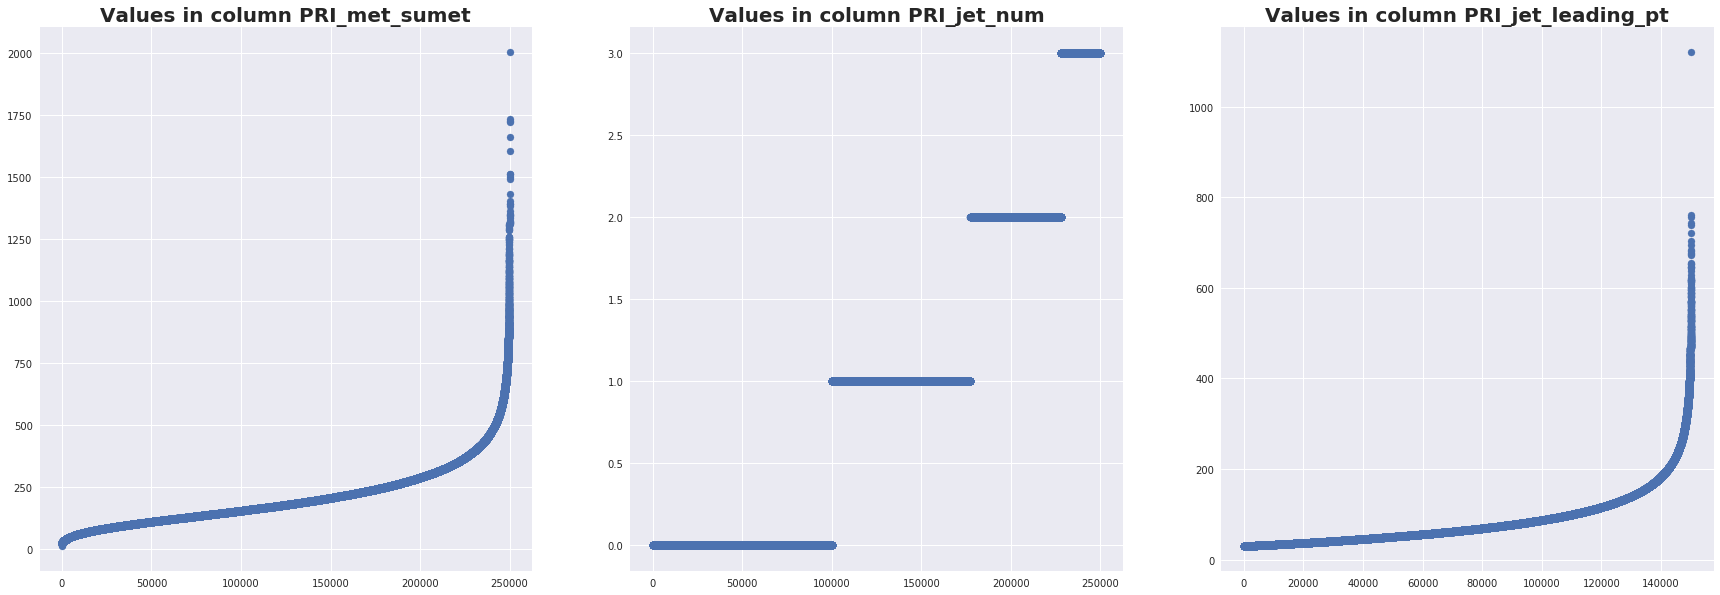

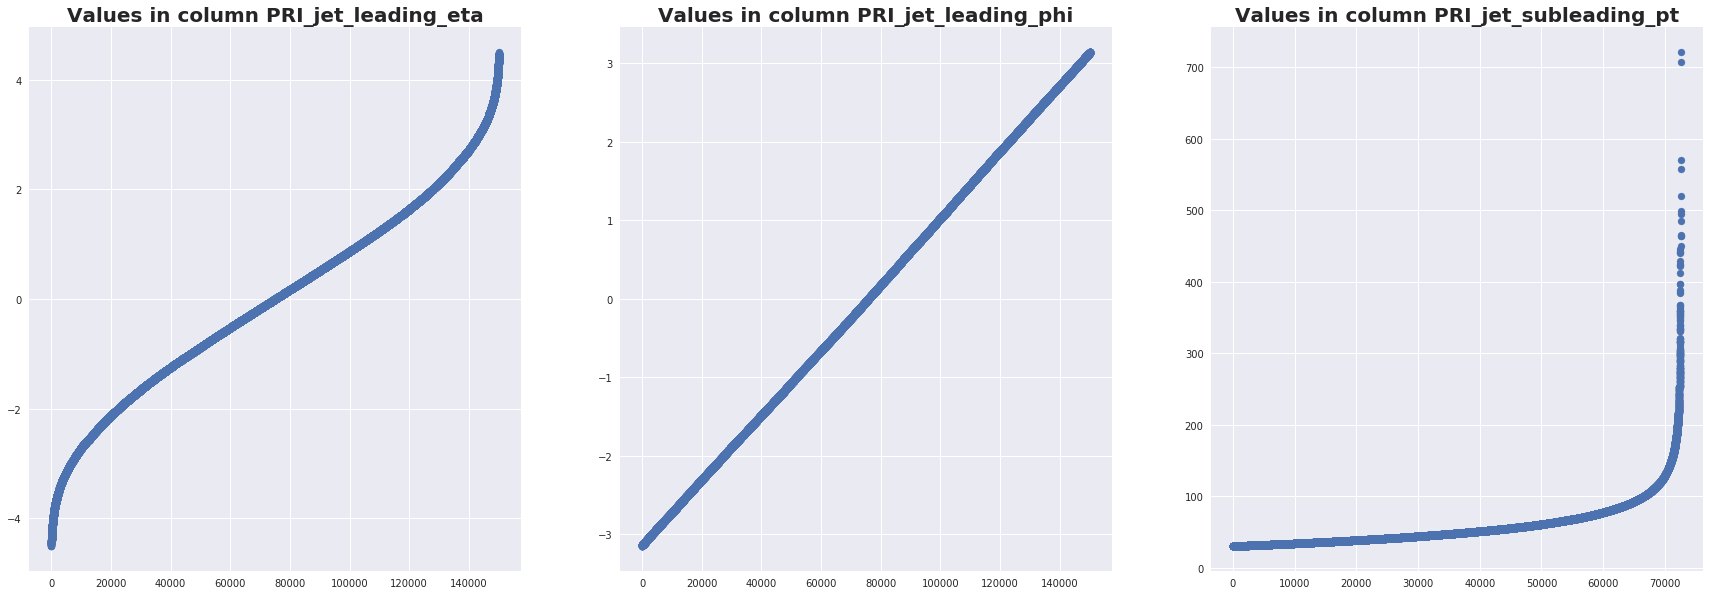

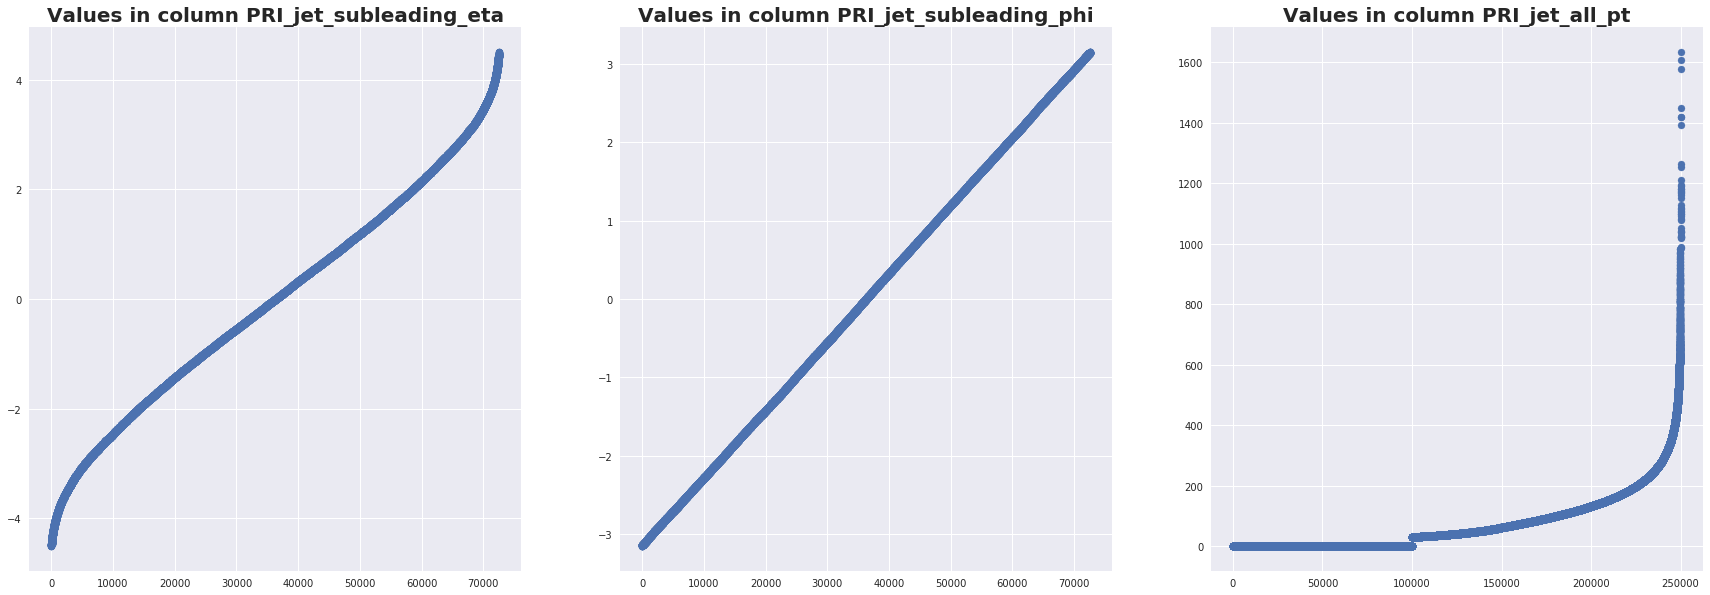

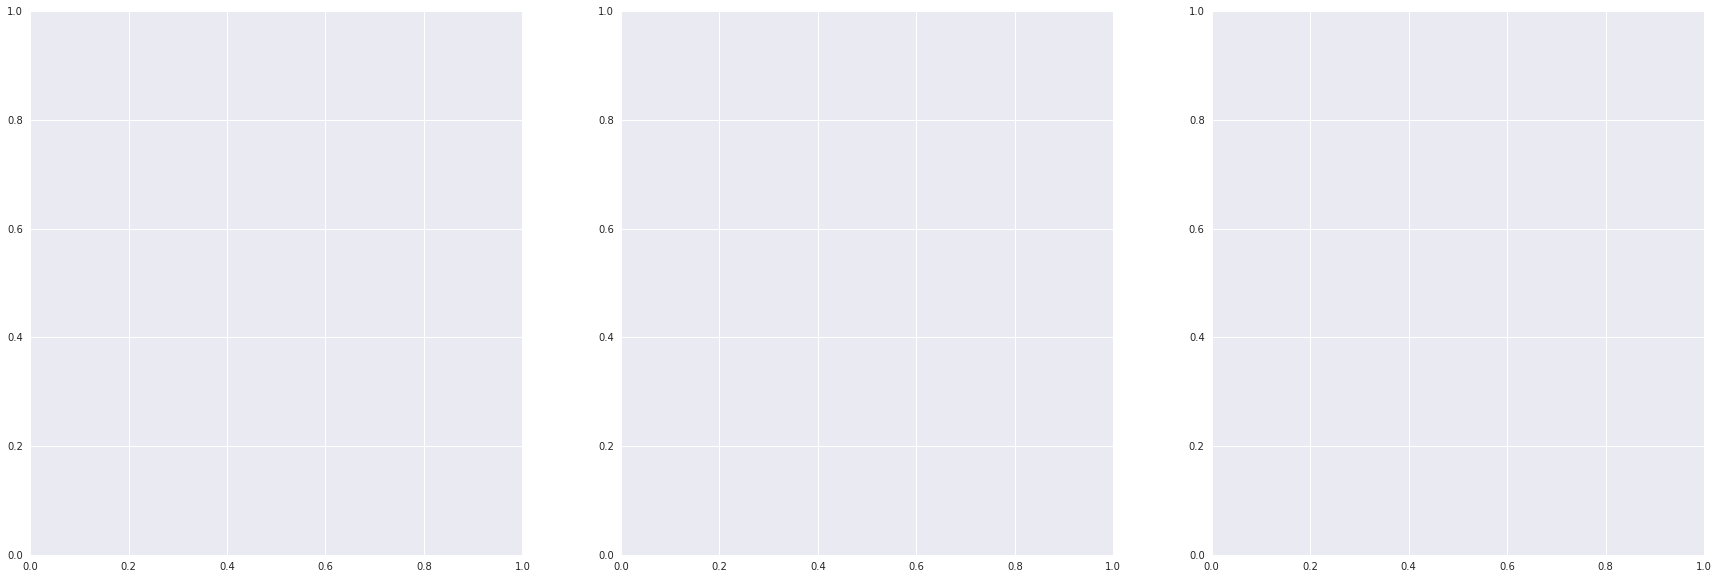

In [48]:
plots_values_train_test(train)

In [49]:
         
    #f, axarr = plt.subplots(2, 2)
    #axarr[0, 0].plot(x, y)
    #axarr[0, 0].set_title('Axis [0,0]')
    #axarr[0, 1].scatter(x, y)
    #axarr[0, 1].set_title('Axis [0,1]')
    #axarr[1, 0].plot(x, y ** 2)
    #axarr[1, 0].set_title('Axis [1,0]')
    #axarr[1, 1].scatter(x, y ** 2)
    #axarr[1, 1].set_title('Axis [1,1]')

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
    #plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    #plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

In [50]:
jet0.columns

Index(['index', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [51]:
 def compare_jets(data,jet0,jet1,jet2,jet3,data_name):
    #needed_subplots = (len(jet0.columns)-1) # the first column being the index
    fig1, ax1 = plt.subplots(len(data.columns[0:]),4)
    fig1.set_figheight(len(data.columns[1:-1])*10)
    fig1.set_figwidth(30)
    my_list = [jet0,jet1,jet2,jet3]
    
    for k,column in enumerate (data.columns[1:]):
        for i,jet in enumerate(my_list):
            ax1[k,i].set_title('{} in jet{}'.format(column,i),fontsize=20,fontweight="bold")
            ax1[k,i].scatter(jet['index'],jet.sort_values([column])[column])


    fig1.savefig(data_name+' jet comparison.png', bbox_inches='tight')
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

In [52]:
 def compare_jets_tot(data,jet0,jet1,jet2,jet3,data_name):
    #needed_subplots = (len(jet0.columns)-1) # the first column being the index
    fig1, ax1 = plt.subplots(len(data.columns[0:]),4,sharey='row')
    fig1.set_figheight(len(data.columns[2:-1])*10)
    fig1.set_figwidth(30)
    my_list = [jet0,jet1,jet2,jet3]
    
    for k,column in enumerate (data.columns[2:]):
        for i,jet in enumerate(my_list):
            ax1[k,i].set_title('{} in jet{}'.format(column,i),fontsize=20,fontweight="bold")
            background = jet[jet['Prediction']==-1.0]
            signal = jet[jet['Prediction']==1.0]
            
            ax1[k,i].scatter(background['index'],\
                             background.sort_values([column])[column],\
                             color='b',s=0.01)
            
            ax1[k,i].scatter(signal['index'],\
                             signal.sort_values([column])[column],\
                             color='g',s=0.01)


    fig1.savefig(data_name+' jet comparison.png', bbox_inches='tight')
            #for j in range(len(texts)):
             #   texts[j].set_fontsize(15)
              #  autotexts[j].set_fontsize(15)

In [53]:
 def compare_jets_sns(data,jet0,jet1,jet2,jet3,data_name):
    #needed_subplots = (len(jet0.columns)-1) # the first column being the index
    
    bin_num = 100
    nan_cols_jet1 = ['PRI_jet_subleading_phi','PRI_jet_subleading_eta','PRI_jet_subleading_pt',\
                   'DER_lep_eta_centrality','DER_prodeta_jet_jet','DER_mass_jet_jet','DER_deltaeta_jet_jet']
    nan_cols_jet0 = nan_cols_jet1 + ['PRI_jet_leading_phi','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_all_pt']
    
    fig1, ax1 = plt.subplots(2*len(data.columns[0:]),4,sharex='row',sharey='row')
    fig1.set_figheight(len(data.columns[2:-1])*30)
    fig1.set_figwidth(60)
    my_list = [jet0,jet1,jet2,jet3]
    
    for k,column in enumerate (data.columns[:]):
        for i,jet in enumerate(my_list):
            if (column!='PRI_jet_num'):
                if (i==0):
                    if not(column in nan_cols_jet0):
                        signal = jet[jet['Prediction']==1.0]
                        ax1[2*k,i].set_title('{} in jet{}, signal'.format(column,i),fontsize=20,fontweight="bold")
                        sns.countplot(give_bins_column(signal,column,bin_num), ax = ax1[2*k,i],palette='autumn')

                        background = jet[jet['Prediction']==-1.0]
                        ax1[2*k+1,i].set_title('{} in jet{}, background'.format(column,i),fontsize=20,fontweight="bold")
                        sns.countplot(give_bins_column(background,column,bin_num), ax = ax1[2*k+1,i],palette='winter')
                elif (i==1):
                    if not(column in nan_cols_jet1):
                        signal = jet[jet['Prediction']==1.0]
                        ax1[2*k,i].set_title('{} in jet{}, signal'.format(column,i),fontsize=20,fontweight="bold")
                        sns.countplot(give_bins_column(signal,column,bin_num), ax = ax1[2*k,i],palette='autumn')

                        background = jet[jet['Prediction']==-1.0]
                        ax1[2*k+1,i].set_title('{} in jet{}, background'.format(column,i),fontsize=20,fontweight="bold")
                        sns.countplot(give_bins_column(background,column,bin_num), ax = ax1[2*k+1,i],palette='winter')
                else:
                    signal = jet[jet['Prediction']==1.0]
                    ax1[2*k,i].set_title('{} in jet{}, signal'.format(column,i),fontsize=20,fontweight="bold")
                    sns.countplot(give_bins_column(signal,column,bin_num), ax = ax1[2*k,i],palette='autumn')

                    background = jet[jet['Prediction']==-1.0]
                    ax1[2*k+1,i].set_title('{} in jet{}, background'.format(column,i),fontsize=20,fontweight="bold")
                    sns.countplot(give_bins_column(background,column,bin_num), ax = ax1[2*k+1,i],palette='winter')
            

    fig1.savefig(data_name+' jet_comparison_sns.png', bbox_inches='tight')


In [54]:
subset_1 = train[['DER_mass_MMC', 'DER_mass_transverse_met_lep',\
                   'DER_mass_vis',\
                   'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet',
                   'DER_deltar_tau_lep','DER_pt_ratio_lep_tau', 'PRI_met','PRI_met_sumet']]
subset_2 = train [[  'PRI_jet_leading_pt','PRI_jet_subleading_pt','PRI_jet_all_pt','DER_sum_pt','PRI_lep_pt','PRI_tau_pt',\
                   'DER_pt_h','DER_pt_tot',\
                   'PRI_jet_subleading_phi','PRI_jet_leading_phi','PRI_tau_phi','PRI_lep_phi','PRI_met_phi',\
                   'PRI_jet_subleading_eta','PRI_jet_leading_eta','PRI_lep_eta','PRI_tau_eta',\
                   'DER_met_phi_centrality','DER_lep_eta_centrality']]

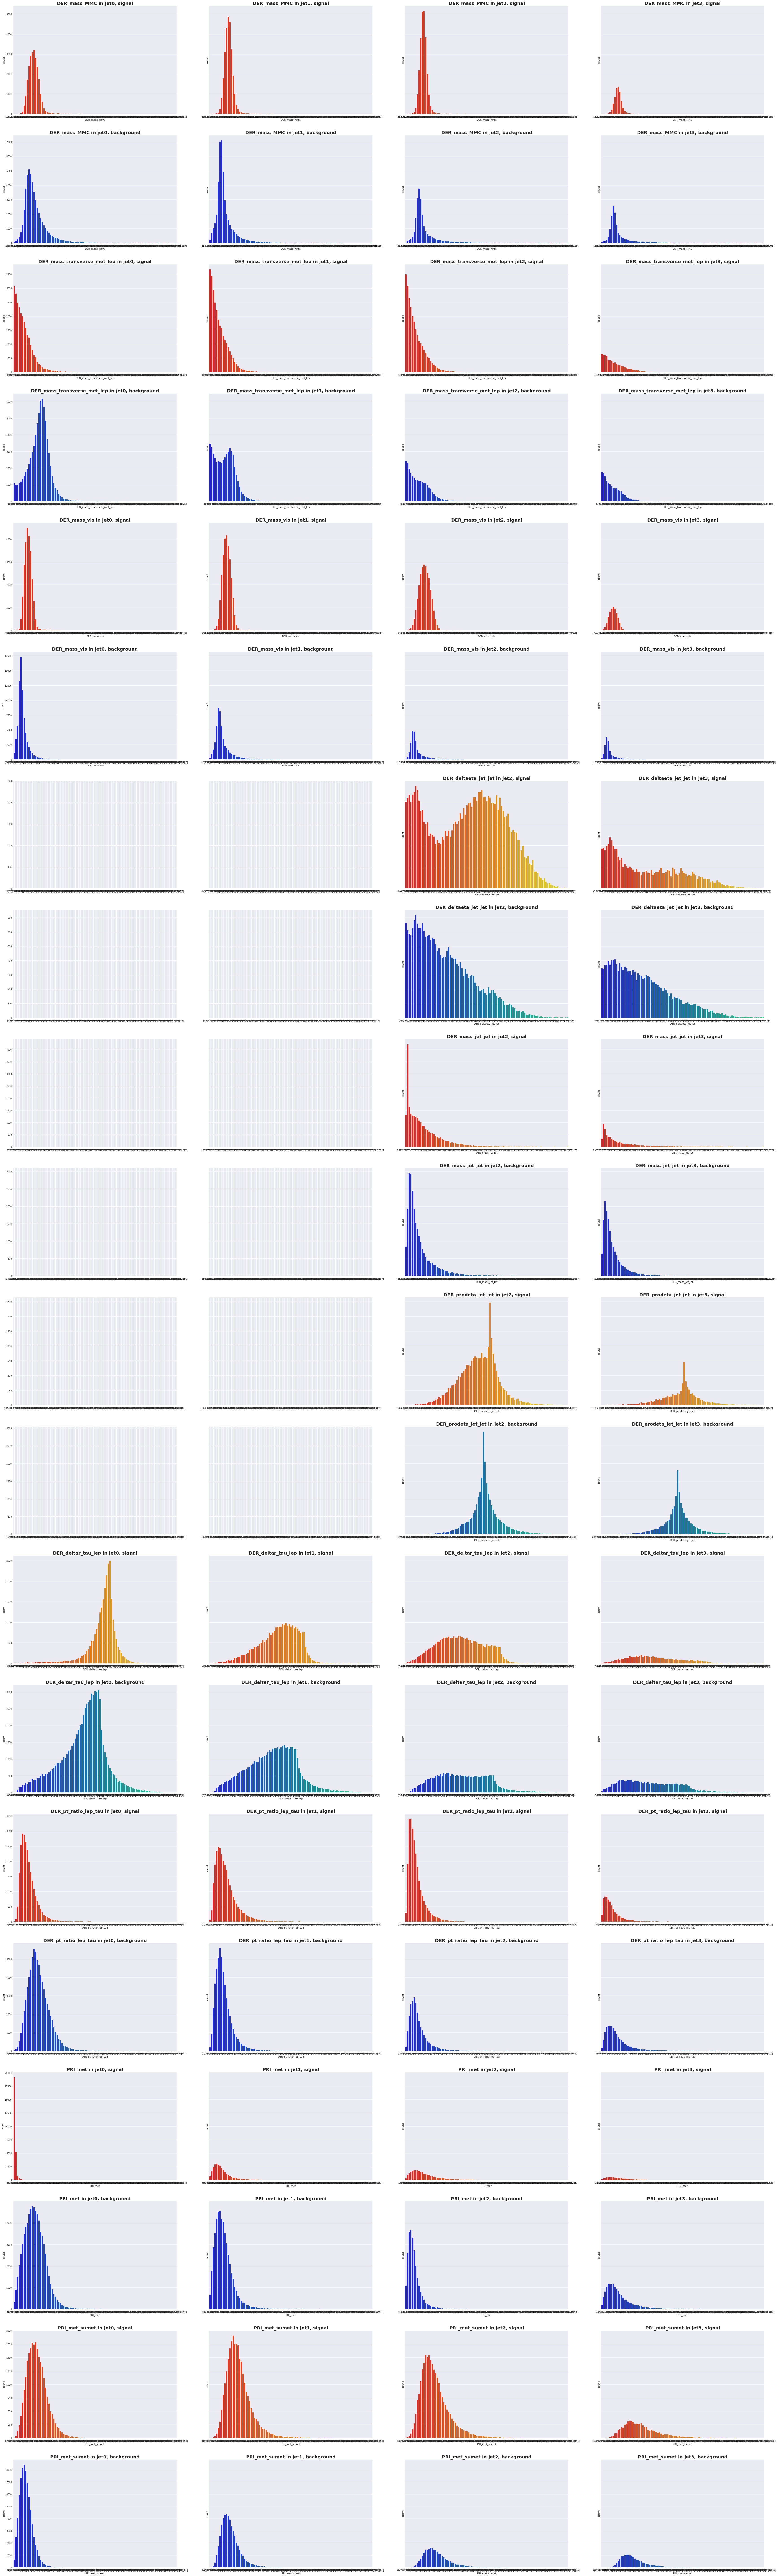

In [61]:
compare_jets_sns(subset_1,jet0,jet1,jet2,jet3,'subset1_sns')

In [62]:
compare_jets_sns(subset_2,jet0,jet1,jet2,jet3,'subset2_sns')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


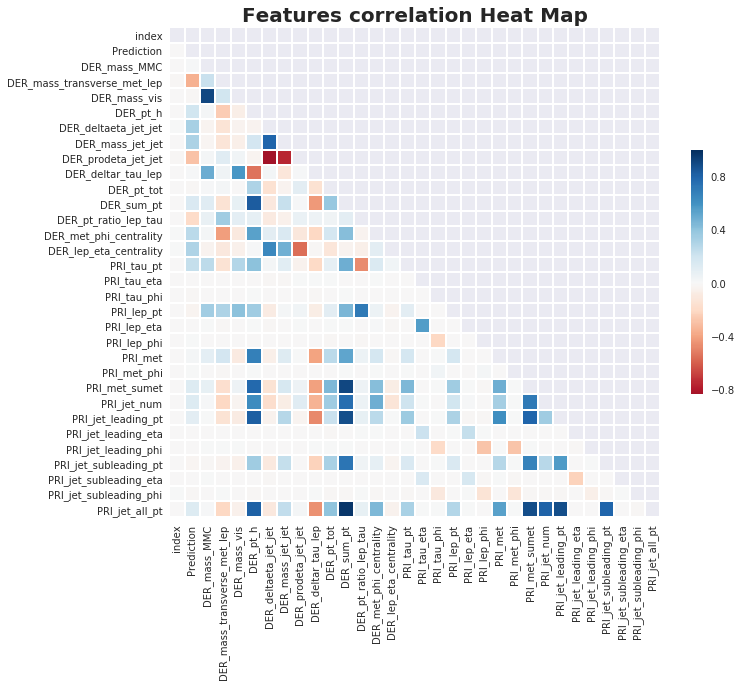

In [55]:


# Compute the correlation matrix
corr = train_tot.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
sns.set_style("dark")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', center=0, #vmax=.3,
            square=False, linewidths=1, cbar_kws={"shrink": .5})

plt.title("Features correlation Heat Map", fontsize=20).set_weight('bold')

plt.savefig('Correlation_matrix.png', bbox_inches='tight')


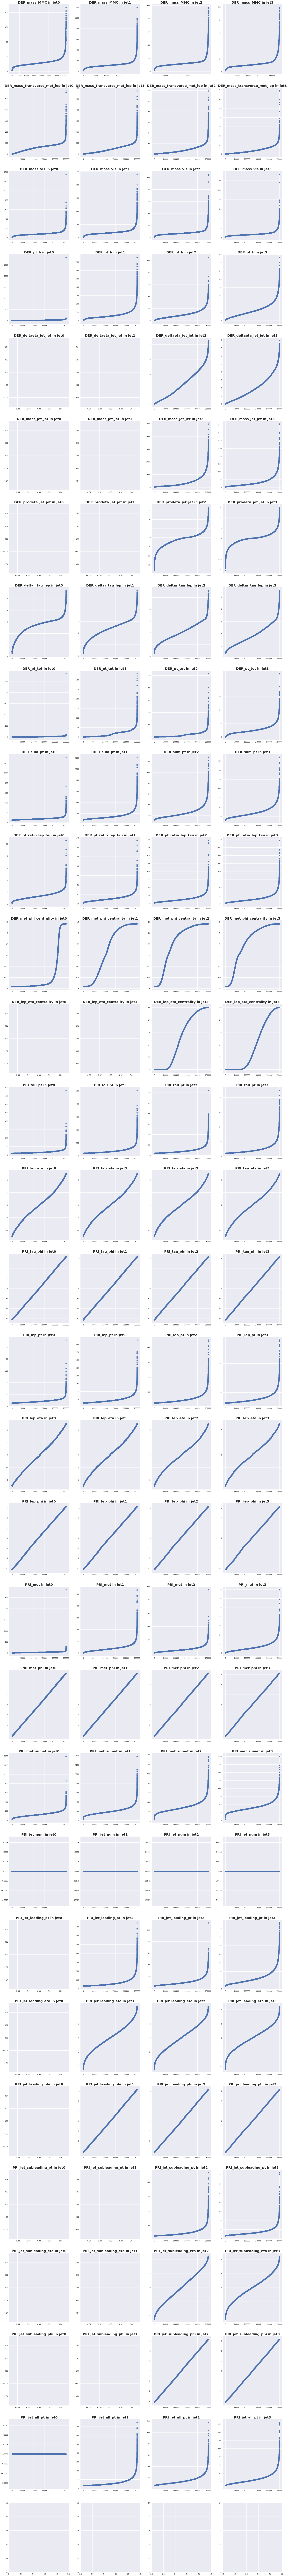

In [64]:
compare_jets(train,jet0,jet1,jet2,jet3,'train')

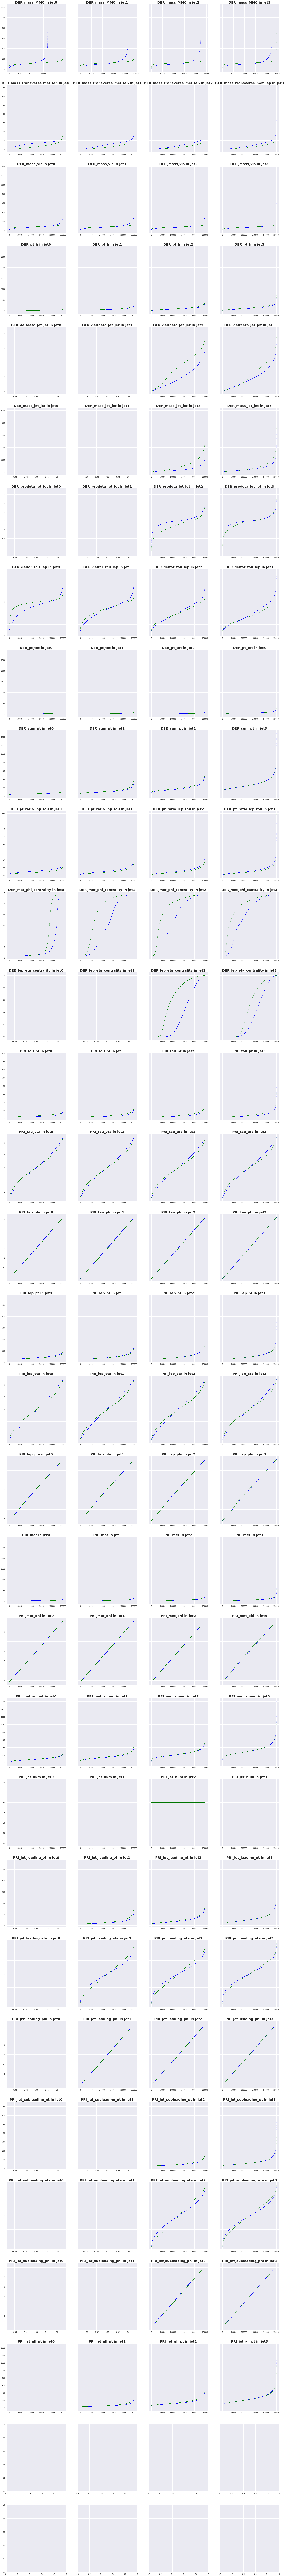

In [65]:
compare_jets_tot(train_tot,jet0,jet1,jet2,jet3,'train_tot')

In [65]:
def compare_jets_dist(data,jet0,jet1,jet2,jet3,data_name):
    #needed_subplots = (len(jet0.columns)-1) # the first column being the index
    
    nan_cols_jet1 = ['PRI_jet_subleading_phi','PRI_jet_subleading_eta','PRI_jet_subleading_pt',\
                   'DER_lep_eta_centrality','DER_prodeta_jet_jet','DER_mass_jet_jet','DER_deltaeta_jet_jet']
    nan_cols_jet0 = nan_cols_jet1 + ['PRI_jet_leading_phi','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_all_pt']
    
    fig1, ax1 = plt.subplots(len(data.columns[0:]),4,sharex='row',sharey='row')
    fig1.set_figheight(len(data.columns[2:-1])*30)
    fig1.set_figwidth(60)
    my_list = [jet0,jet1,jet2,jet3]
    
    for k,column in enumerate (data.columns[:]):
        for i,jet in enumerate(my_list):
            ax1[k,i].set_title('{} in jet{}'.format(column,i),fontsize=20,fontweight="bold")
            signal = jet[jet['Prediction']==1.0]
            background = jet[jet['Prediction']==-1.0]
            
            if (column!='PRI_jet_num'):
                if (i==0):
                    if not(column in nan_cols_jet0):
                        sns.distplot(background.sort_values([column])[column].dropna() ,ax = ax1[k,i],label='background')
                        sns.distplot(signal.sort_values([column])[column].dropna() ,ax = ax1[k,i],label='signal')
                elif (i==1):
                    if not(column in nan_cols_jet1):
                        sns.distplot(background.sort_values([column])[column].dropna() ,ax = ax1[k,i],label='background')
                        sns.distplot(signal.sort_values([column])[column].dropna() ,ax = ax1[k,i],label='signal')
                else:  
                    sns.distplot(background.sort_values([column])[column].dropna() ,ax = ax1[k,i],label='background')
                    sns.distplot(signal.sort_values([column])[column].dropna() ,ax = ax1[k,i],label='signal')
                    
            ax1[k,i].legend()
            ax1[k,i].set_xlabel( 'Equally spaced bins, from min to max' ,fontsize=12).set_weight('bold')
            ax1[k,i].set_ylabel('distribution', fontsize=12).set_weight('bold')

    fig1.savefig(data_name+' jet_comparison_sns.png', bbox_inches='tight')

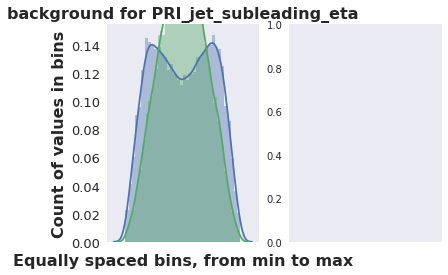

In [59]:
column = 'PRI_jet_subleading_eta'
bin_num = 100

fig1, ax1 = plt.subplots(1,2,sharex='row')

#ax1[0].set(xscale="log", yscale="log")
#ax1[1].set_xticklabels([])
#   autumn    Dark2    winter   summer    plasma   spring
def my_count_plot(df,name,pos):
    ncount = len(give_bins_column(df,column,bin_num))
    #sns.countplot(give_bins_column(df,column,bin_num)/ncount, ax = ax1[pos],palette='winter')
    sns.distplot(df.sort_values([column])[column],ax = ax1[pos])
    
    
    
    #ax1[pos].set(xticks=np.linspace(1,bin_num,5))
    ax1[pos].set_xticklabels([])
    ax1[pos].set_xlabel( 'Equally spaced bins, from min to max' ,fontsize=16).set_weight('bold')
    ax1[pos].set_ylabel('Count of values in bins', fontsize=16).set_weight('bold')
    ax1[pos].set_title(name+' for '+column, fontsize=16).set_weight('bold')
    for label in ax1[pos].get_xticklabels():
            label.set_fontsize(13)
    for label in ax1[pos].get_yticklabels():
            label.set_fontsize(13)      
    for p in ax1[pos].patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
    #ax1[pos].set_ylim(0,100)

    
signal2 = signal[['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']].dropna()    

background2 = background[['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']].dropna() 
    
my_count_plot(signal2,'signal',pos=0)
my_count_plot(background2,'background',pos=0)

In [66]:
compare_jets_dist(train,jet0,jet1,jet2,jet3,'train_dist')

/home/zampieri/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Writing this down in a file: 

In [ ]:
def create_csv_file(ids, y_pred, name):
    """
    Creates an output file in csv format for submission to kaggle
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               name (string name of .csv output file to be created)
    """
    with open(name, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({'Id':int(r1),'Prediction':int(r2)})